In [12]:
# from glob import glob
import os

import numpy as np
import pandas as pd

import colorcet as cc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import lateral_signaling as lsig
lsig.default_rcParams()

# import holoviews as hv
# hv.extension("matplotlib")

In [13]:
# Reading
data_dir   = os.path.abspath("../data/PIV_and_density/")
data_fname = os.path.join(data_dir, "2020-08-26_TCmovie_speed_dens_data.csv")

# Writing
save_dir  = os.path.abspath("../plots")
plot_fname = os.path.join(save_dir, "PIV_velocity_plot")

save=False
fmt="png"
dpi=300

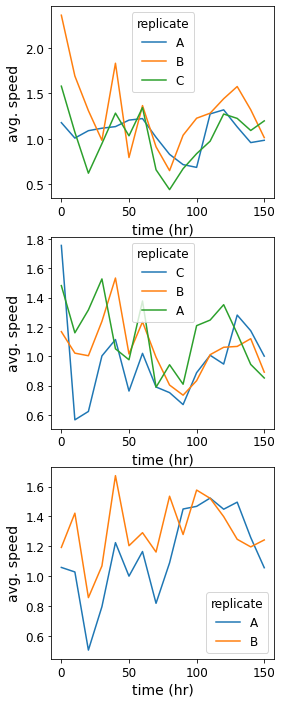

In [60]:
# def main(
#     save=False,
#     fmt="png",
#     dpi=300,
#     data_dir="../data/PIV_and_density",
#     data_fname="2020-08-26_TCmovie_speed_dens_data.csv",
#     save_dir="../plots",
#     plot_fname="PIV_velocity_plot",
# ):
#     """
#     """
    
data_dir   = os.path.abspath(data_dir)
data_fname = os.path.join(data_dir, data_fname)
save_dir   = os.path.abspath(data_dir)
plot_fname = os.path.join(save_dir, plot_fname)

df = pd.read_csv(data_fname, index_col=0)
relative_density = [d / 40000 for d in df["plating density"]]
relative_density = [f"{d:.2f}x" if d < 1 else f"{int(d)}x" for d in relative_density]
df["plating density"] = relative_density
df = df.sort_values("plating density")

# Package plotting options
# ecdf_kw = dict(
#     xlabel="Circularity index",
#     xlim=(0, 1),
#     xticks=(0, 0.25, 0.5, 0.75, 1.0),
#     ylabel="Cumulative distrib.",
#     ylim=(-0.05, 1.05),
#     yticks=(0, 0.25, 0.5, 0.75, 1.0),
# )
# hist_kw = dict(
#         xlabel="Circularity index",
#         xlim=(0, 1),
#         xticks=np.linspace(0, 1, 6),
#         ylabel="Frequency",
#         # ylim=(-0.05, 1.05),
#         # yticks=(0, 0.25, 0.5, 0.75, 1.0),
# )

# color_idx = df["replicate"].astype("category").cat.codes.values
# colors = cc.glasbey_category10[color_idx]

gdfs = df.groupby("plating density")
fig, axs = plt.subplots(3, 1, figsize=(4, 12))
for ax, (_, data) in zip(axs, gdfs):
    # sns.boxplot(x="time (hr)", y="avg. speed", data=data, ax=ax, )
    # sns.stripplot(x="time (hr)", y="avg. speed", data=data, hue="replicate", ax=ax)
    sns.lineplot(x="time (hr)", y="avg. speed", data=data, hue="replicate", ax=ax)


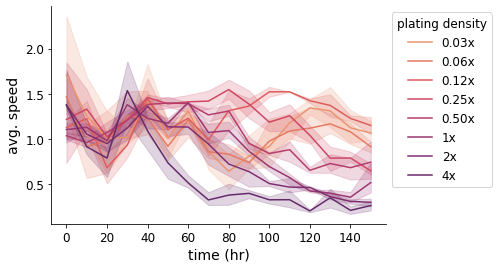

In [62]:
fig = plt.figure()
ax = fig.add_subplot()
g = sns.lineplot(
    x="time (hr)", 
    y="relative speed", 
    data=df, 
    hue="plating density", 
    palette="flare",
    ax=ax,
)
sns.despine()
sns.move_legend(g, "upper left", bbox_to_anchor=(1.0, 1.0))

In [49]:
df[["avg. speed", "plating density"]].groupby("plating density").agg(np.mean)

,avg. speed
plating density,
1000,1.123570
2500,1.047117
5000,1.226757
10000,1.193528
20000,1.031523
40000,0.899339
80000,0.802401
160000,0.608543


In [54]:
df["time (hr)"].unique()

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150])

In [23]:
ser = pd.Series(df["replicate"]).astype("category")